In [1]:
import numpy as np 
import matplotlib.pyplot as plt


In [ ]:
def plot(x,y):
    
    plt.scatter(x, y, color='blue', marker='o')

# Labels and title
    plt.xlabel("avg_enr")
    plt.ylabel("ppf")
    #plt.title("y vs x Plot")
    plt.grid(True)
    plt.show()
#[5.07,5.14,4.96,4.86,[1.064,1.061,1.058,1.064,
avg_enr=np.array([5.15,4.98,4.80,4.98,4.91,4.70,4.71,4.72,4.74,4.72,4.74,4.90])
ppf=np.array([1.079,1.080,1.064,1.061,1.061,1.102,1.067,1.089,1.064,1.097,1.069,1.114])
r_diff=np.array([0.5-1.25,0.75-1.5,0.25-1.25,0.5-1,0.25-0.75,1.25-1,1-1.25,0.75-1.5,0.5-1,0.5-0.25,0.25-0.25,0.5-0.5])
min_=np.array([0.913,0.918,0.907,0.902,0.902,0.878,0.895,0.917,0.900,0.907,0.897,0.875])
enr=np.array([5.75,5.75,5.5,5.5,5.25,5.5,5.5,5.5,5.25,5,5,5.25])
plot(-r_diff,min_)



In [3]:

from scipy.optimize import minimize

# Known values
n1, n2, n3 = 92, 76, 96  # pin counts per zone
E_avg = 5.0
x2_fixed = 5.5  # Intermediate enrichment

# Objective: minimize asymmetry in gradient
def objective(x):
    x1, x3 = x
    top = abs(x2_fixed - x1)
    bottom = abs(x2_fixed - x3)
    return top / bottom if bottom != 0 else 1e6  # Avoid div by zero

# Constraint: fixed average enrichment
def avg_enrichment_constraint(x):
    x1, x3 = x
    return (n1 * x1 + n2 * x2_fixed + n3 * x3) / (n1 + n2 + n3) - E_avg

# Set up constraint dict
constraints = [{'type': 'eq', 'fun': avg_enrichment_constraint}]

# Initial guess
x0 = [4.8, 4.6]  # guess for x1 (outer) and x3 (inner)

# Minimize
result = minimize(objective, x0, constraints=constraints)

if result.success:
    x1_opt, x3_opt = result.x
    print(f"Enrichment outer (x1):     {x1_opt:.2f}%")
    print(f"Enrichment intermediate:   {x2_fixed:.2f}%")
    print(f"Enrichment inner (x3):     {x3_opt:.2f}%")
else:
    print("Optimization failed:", result.message)

Enrichment outer (x1):     5.50%
Enrichment intermediate:   5.50%
Enrichment inner (x3):     4.12%


In [29]:
# Given data r=x1-x2/x1-x3
n1, n2, n3 = 92, 76, 96
E_avg = 5.0
x1_fixed = 5.5
r = 1# ratio between top and bottom gradients

# Total number of positions
N = n1 + n2 + n3

A = n2 * ((1 - r) * x1_fixed) + n1 * x1_fixed
B = n2 * r + n3
rhs = N * E_avg

# Solve for x3
x3 = (rhs - A) / B

# Now get x1
x2 = (1 - r) * x1_fixed + r * x3

# Output results
print(f"Outer enrichment (x1):      {x1_fixed:.2f}%")
print(f"Intermediate enrichment:   {x2:.2f}%")
print(f"Inner enrichment (x3):     {x3:.2f}%")

Outer enrichment (x1):      5.50%
Intermediate enrichment:   4.73%
Inner enrichment (x3):     4.73%


In [21]:
#computing the weighted ratio
# Given data
n1, n2, n3 = 64, 56, 144
E_avg = 5.0
x1_fixed = 5.5
r = 0.5# ratio between top and bottom gradients R=(n1x1-n2x2)/(n1x1-n3x3)

# Total number of positions
N = n1 + n2 + n3

# Solve for x3
x3 = (E_avg*N+n1*x1_fixed*(r-2.))/(n3*(1+r))
# Now get x2
x2 =(E_avg*N-n1*x1_fixed-n3*x3)/n2

# Output results
print(f"Outer enrichment (x1):      {x1_fixed:.2f}%")
print(f"Intermediate enrichment:   {x2:.2f}%")
print(f"Inner enrichment (x3):     {x3:.2f}%")


# We'll solve as a linear system:
import sympy
from sympy import symbols, Eq, solve

x2, x3 = symbols('x2 x3')

eq1 = Eq(n2*x2 + n3*x3, E_avg * (n1 + n2 + n3) - n1*x1_fixed)
eq2 = Eq(n1*x1_fixed - n2*x2, r * (n1*x1_fixed - n3*x3))

sol = solve((eq1, eq2), (x2, x3))

x2_val = float(sol[x2])
x3_val = float(sol[x3])

print(f"Outer Enrichment (x1):      {x1_fixed:.2f}%")
print(f"Intermediate Enrichment:   {x2_val:.2f}%")
print(f"Inner Enrichment (x3):     {x3_val:.2f}%")


Outer enrichment (x1):      5.50%
Intermediate enrichment:   5.79%
Inner enrichment (x3):     3.90%
Outer Enrichment (x1):      5.50%
Intermediate Enrichment:   5.79%
Inner Enrichment (x3):     3.90%


In [26]:
#equal differences n1x1-n2x2=n2x2-n3x3=delta===>r_pond=1
n1, n2, n3 = 64, 56, 144
E_avg = 5.0
delta=0.5
# Total number of positions
N = n1 + n2 + n3

x2_=(E_avg*N+2*delta)/(3*n2)
x1_=(n2*x2_-delta)/n1
x3_=(n2*x2_-delta)/n3

# Output results
print(f"Outer enrichment (x1):      {x1_:.2f}%")
print(f"Intermediate enrichment:   {x2_:.2f}%")
print(f"Inner enrichment (x3):     {x3_:.2f}%")

#equal differences x1-x2/x2-x3=r_diff

n1, n2, n3 = 68, 16, 180
E_avg = 5.0
r=0.5
x1__=5.5

# Total number of positions
N = n1 + n2 + n3

x2__=(r*E_avg*N-r*n1*x1__+n3*x1__)/(r*n2+n3*(1+r))

x3__=((1+r)*x2__-x1__)/r

# Output results
print(f"Outer enrichment (x1):      {x1__:.2f}%")
print(f"Intermediate enrichment:   {x2__:.2f}%")
print(f"Inner enrichment (x3):     {x3__:.2f}%")

Outer enrichment (x1):      6.87%
Intermediate enrichment:   7.86%
Inner enrichment (x3):     3.05%
Outer enrichment (x1):      5.50%
Intermediate enrichment:   5.26%
Inner enrichment (x3):     4.79%


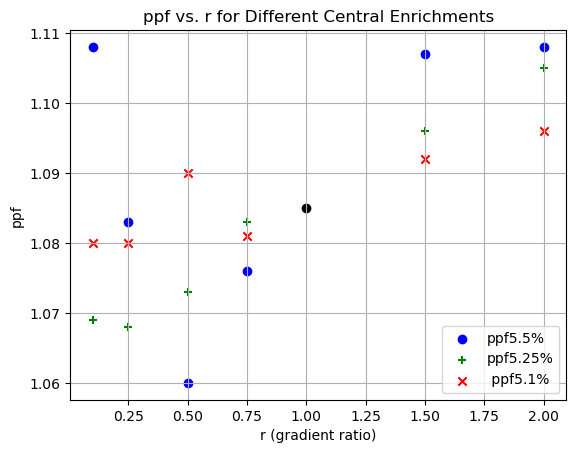

In [46]:

ppf_55=np.array([1.108,1.083,1.060,1.076,1.107,1.108])
ppf_525=np.array([1.069,1.068,1.073,1.083,1.096,1.105])
ppf_51=np.array([1.080,1.080,1.090,1.081,1.092,1.096])

r_diff=np.array([0.1,0.25,0.5,0.75,1.5,2])

min_55=np.array([0.878,0.898,0.907,0.893,0.884,0.870])
min_525=np.array([0.909,0.900,0.900,0.896,0.885,0.886])
min_51=np.array([0.903,0.894,0.894,0.892,0.882,0.890])
delta_ppf55=ppf_55-min_55
delta_ppf525=ppf_525-min_525
delta_ppf51=ppf_51-min_51

plt.figure()

plt.scatter(r_diff, ppf_55,  color='blue', label='ppf5.5%', marker='o')
plt.scatter(r_diff, ppf_525,  color='green', label='ppf5.25%', marker='+')
plt.scatter(r_diff, ppf_51,  color='red', label=' ppf5.1%', marker='x')
plt.scatter(1,1.085, color="black")#normal asssembly
'''
plt.scatter(r_diff, min_55,  color='yellow', label='min5.5%', marker='o')
plt.scatter(r_diff, min_525,  color='black', label='min5.25%', marker='+')
plt.scatter(r_diff, min_51,  color='purple', label=' min5.1%', marker='x')
plt.scatter(1,0.888, color="black") #normal assembly
plt.scatter(r_diff,delta_ppf55,  color='blue', label='ppf5.5%', marker='o')
plt.scatter(r_diff,delta_ppf525,  color='green', label='ppf5.25%', marker='+')
plt.scatter(r_diff,delta_ppf51,  color='red', label=' ppf5.1%', marker='x')
plt.scatter(1,1.085-0.888, color="black")#normal asssembly
'''
# Labels and Legend
plt.xlabel("r (gradient ratio)")
plt.ylabel("ppf")
plt.title("ppf vs. r for Different Central Enrichments")
plt.legend()
plt.grid(True)
plt.show()

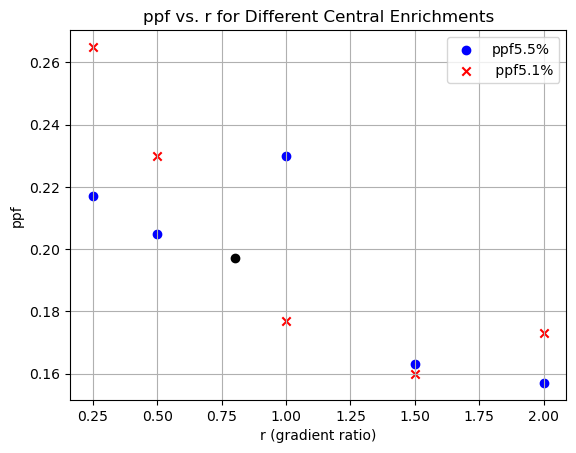

In [50]:
#weighted ratio
ppf_55=np.array([1.098,1.087,1.108,1.066,1.064])

ppf_51=np.array([1.129,1.108,1.073,1.062,1.076])

r_pond=np.array([0.25,0.5,1,1.5,2])

min_55=np.array([0.881,0.882,0.878,0.903,0.907])

min_51=np.array([0.864,0.878,0.896,0.902,0.903])
delta_ppf55=ppf_55-min_55
delta_ppf51=ppf_51-min_51

plt.figure()

'''
plt.scatter(r_pond, ppf_55,  color='blue', label='ppf5.5%', marker='o')
plt.scatter(r_pond, ppf_51,  color='red', label=' ppf5.1%', marker='x')
plt.scatter(0.8,1.085, color="black")#normal asssembly
plt.scatter(r_pond, min_55,  color='yellow', label='min5.5%', marker='o')
plt.scatter(r_pond, min_51,  color='purple', label=' min5.1%', marker='x')
plt.scatter(0.8,0.888, color="black") #normal assembly
'''
plt.scatter(r_pond,delta_ppf55,  color='blue', label='ppf5.5%', marker='o')
plt.scatter(r_pond,delta_ppf51,  color='red', label=' ppf5.1%', marker='x')
plt.scatter(0.8,1.085-0.888, color="black")#normal asssembly
# Labels and Legend
plt.xlabel("r (gradient ratio)")
plt.ylabel("ppf")
plt.title("ppf vs. r for Different Central Enrichments")
plt.legend()
plt.grid(True)
plt.show()

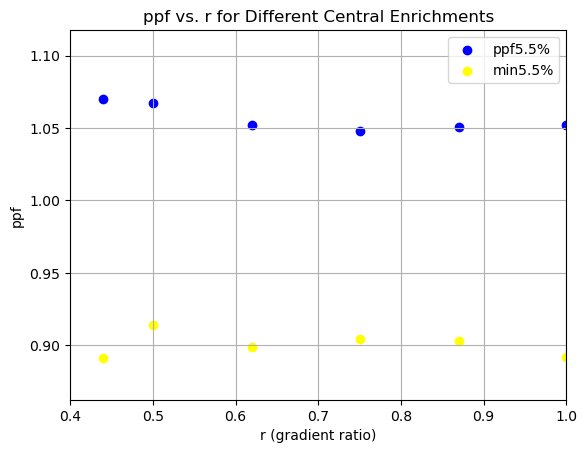

In [57]:
#plotting the r_diff=...
#related uncertanties to be esported from the file of the flux. then propagation of the error
ppf_55=np.array([1.106,1.089,1.071,1.070,1.067,1.052,1.048,1.051,1.052,1.055,1.056,1.062])
ppf_525=np.array([1.065,1.060,1.059,1.058,1.063,1.068,1.067,1.066,1.075])

r_diff=np.array([0.1,0.25,0.38,0.44,0.5,0.62,0.75,0.87,1,1.5,2,3])

min_55=np.array([0.874,0.883,0.894,0.891,0.914,0.899,0.904,0.903,0.892,0.888,0.880,0.878])
min_525=np.array([0.907,0.895,0.911,0.914,0.905,0.904,0.894,0.878,0.891])

delta_ppf55=ppf_55-min_55
delta_ppf525=ppf_525-min_525

plt.figure()

plt.scatter(r_diff, ppf_55,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(r_diff, ppf_525,  color='green', label='ppf5.25%', marker='+')
#plt.scatter(1,1.090, color="black")#normal asssembly

plt.scatter(r_diff, min_55,  color='yellow', label='min5.5%', marker='o')
#plt.scatter(r_diff, min_525,  color='black', label='min5.25%', marker='+')
'''

#plt.scatter(1,0.884, color="black") #normal assembly
#plt.scatter(r_diff,delta_ppf525,  color='green', label='ppf5.25%', marker='+')
plt.scatter(r_diff,delta_ppf55,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(1,1.090-0.8884, color="black")#normal asssembly
# Labels and Legend
'''
plt.xlabel("r (gradient ratio)")
plt.xlim(0.4,1.)
plt.ylabel("ppf")
plt.title("ppf vs. r for Different Central Enrichments")
plt.legend()
plt.grid(True)
plt.show()

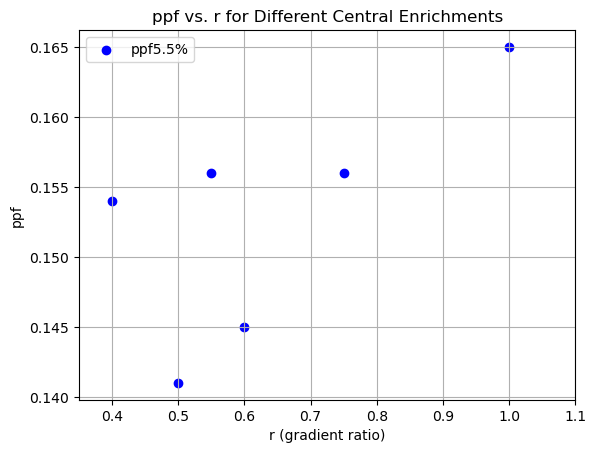

In [12]:
#plotting the r_diff=...
#related uncertanties to be esported from the file of the flux. then propagation of the error
ppf_55=np.array([1.066,1.061,1.052,1.061,1.053,1.057,1.060])
ppf_525=np.array([1.065,1.060,1.059,1.058,1.063,1.068,1.067,1.066,1.075])

r_diff=np.array([0.25,0.4,0.5,0.55,0.6,0.75,1])

min_55=np.array([0.901,0.907,0.911,0.905,0.908,0.901,0.895])
min_525=np.array([0.907,0.895,0.911,0.914,0.905,0.904,0.894,0.878,0.891])

delta_ppf55=ppf_55-min_55
delta_ppf525=ppf_525-min_525

plt.figure()

'''
plt.scatter(r_diff, ppf_55,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(r_diff, ppf_525,  color='green', label='ppf5.25%', marker='+')
#plt.scatter(1,1.090, color="black")#normal asssembly

plt.scatter(r_diff, min_55,  color='yellow', label='min5.5%', marker='o')
#plt.scatter(r_diff, min_525,  color='black', label='min5.25%', marker='+')

'''
#plt.scatter(1,0.884, color="black") #normal assembly
#plt.scatter(r_diff,delta_ppf525,  color='green', label='ppf5.25%', marker='+')
plt.scatter(r_diff,delta_ppf55,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(1,1.090-0.8884, color="black")#normal asssembly
# Labels and Legend
plt.xlabel("r (gradient ratio)")
plt.xlim(0.35,1.1)
plt.ylabel("ppf")
plt.title("ppf vs. r for Different Central Enrichments")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# plotting the same avg and same enrichment with different external enrichment
#related uncertanties to be esported from the file of the flux. then propagation of the error
ppf=np.array([1.084,1.069,1.052,1.077])

ext_enr=np.array([6.,5.75,5.5,5.25])

min_=np.array([0.867,0.894,0.911,0.902])

delta_ppf=ppf-min_

plt.figure()

'''
plt.scatter(ext_enr, ppf,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(ext_enr, ppf,  color='green', label='ppf5.25%', marker='+')
#plt.scatter(1,1.090, color="black")#normal asssembly

plt.scatter(ext_enr, min_,  color='yellow', label='min5.5%', marker='o')
#plt.scatter(ext_enr, min_,  color='black', label='min5.25%', marker='+')

'''
#plt.scatter(1,0.884, color="black") #normal assembly
#plt.scatter(ext_enr,delta_ppf525,  color='green', label='ppf5.25%', marker='+')
plt.scatter(ext_enr,delta_ppf,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(1,1.090-0.8884, color="black")#normal asssembly
# Labels and Legend
plt.xlabel("r (gradient ratio)")
plt.ylabel("ppf")
plt.title("ppf vs. r for Different Central Enrichments")
plt.legend()
plt.grid(True)
plt.show()

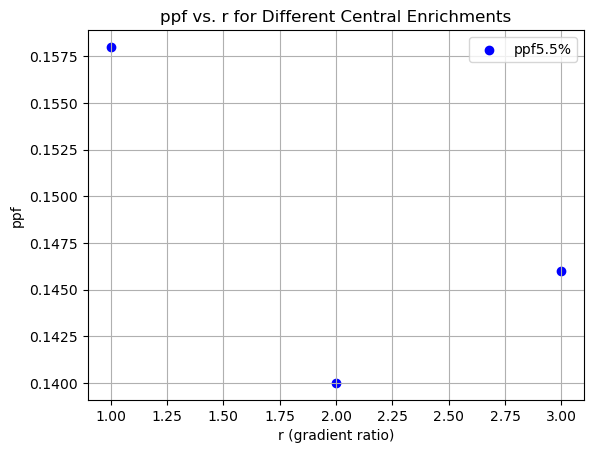

In [21]:
#plotting the same avg, same external enrichment and different geometry 
#related uncertanties to be esported from the file of the flux. then propagation of the error

#the geometry1,2,3 are respectively the geometry with normal rings, 2 is the node (1,1) to higher enr, 3 has the node (2,2) to lower enr zone. 
#4 is the geometry1 with corners, 5 geometry2 with cornes,6 geom3 with corners
ppf=np.array([1.052,1.057,1.059,1.080])

ext_enr=np.array([1,2,3,4,5,6])

min_=np.array([0.894,0.917,0.913,0.913])

delta_ppf=ppf-min_

plt.figure()

'''
plt.scatter(ext_enr, ppf,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(ext_enr, ppf,  color='green', label='ppf5.25%', marker='+')
#plt.scatter(1,1.090, color="black")#normal asssembly

plt.scatter(ext_enr, min_,  color='yellow', label='min5.5%', marker='o')
#plt.scatter(ext_enr, min_,  color='black', label='min5.25%', marker='+')

'''
#plt.scatter(1,0.884, color="black") #normal assembly
#plt.scatter(ext_enr,delta_ppf525,  color='green', label='ppf5.25%', marker='+')
plt.scatter(ext_enr,delta_ppf,  color='blue', label='ppf5.5%', marker='o')
#plt.scatter(1,1.090-0.8884, color="black")#normal asssembly
# Labels and Legend
plt.xlabel("r (gradient ratio)")
plt.ylabel("ppf")
plt.title("ppf vs. r for Different Central Enrichments")
plt.legend()
plt.grid(True)
plt.show()

In [27]:
#four zoning 
from sympy import symbols, Eq, solve, simplify

def solve_enrichment_4zone(x1, r1, r2, E_avg, n1, n2, n3, n4):
    x2, x3, x4 = symbols('x2 x3 x4')

    # Total pin count
    N = n1 + n2 + n3 + n4

    # Equation 1: Weighted average enrichment
    eq1 = Eq(n1*x1 + n2*x2 + n3*x3 + n4*x4, N * E_avg)

    # Equation 2: r1 = (x1 - x2) / (x2 - x3)
    eq2 = Eq((x1 - x2), r1 * (x2 - x3))

    # Equation 3: r2 = (x2 - x3) / (x3 - x4)
    eq3 = Eq((x2 - x3), r2 * (x3 - x4))

    # Solve the system
    sol = solve((eq1, eq2, eq3), (x2, x3, x4), dict=True)

    if sol:
        result = sol[0]
        x2_val = float(result[x2])
        x3_val = float(result[x3])
        x4_val = float(result[x4])
        return x2_val, x3_val, x4_val
    else:
        raise ValueError("No solution found for given input parameters.")

x1 = 5.5   # outer zone enrichment
r1 = 1 # first gradient ratio
r2 = 2   # second gradient ratio
E_avg = 5.0    # target average enrichment

n1, n2, n3, n4 = 68, 56, 32, 108  # number of pins in each region

x2, x3, x4 = solve_enrichment_4zone(x1, r1, r2, E_avg, n1, n2, n3, n4)

print(f"x2 (zone 2): {x2:.2f}%")
print(f"x3 (zone 3): {x3:.2f}%")
print(f"x4 (center): {x4:.2f}%")

x2 (zone 2): 5.16%
x3 (zone 3): 4.82%
x4 (center): 4.65%


In [2]:
def check_enrichment(enrichment, enrichment_pos):
    '''
    It's a function to control the avg value of the enrichment of the assembly.
    -Enrichment is an np.array, it gives the values of enrichment used 
    -enrichment_pos gives a np.array, it reports the number of assembly per enrichment
    '''
    avg_enrichment=0.
    total_pins=264
    for i in range (len(enrichment)):
        avg_enrichment=avg_enrichment+enrichment[i]*enrichment_pos[i]/264
    return avg_enrichment

N=264
n2=196
n1=N-n2
x2=4.6

x1=(5.*N-n2*x2)/n1
enr=[x1,x2]
enr_pos=[n1,n2]

print(check_enrichment(enr,enr_pos))
print(f"x1: {x1:.2f}%")

5.0
x1: 5.72%


In [4]:
#one denotes the external part, 2 denotes the central zone, 3 is the inner part
#it has been used 
AVG=5.
N=264
n2=64
n1=32
n3=N-n2-n1
x2=5.45
x3=4.6

x1=(AVG*N-n2*x2-n3*x3)/n1
enr=[x1,x2,x3]
enr_pos=[n1,n2,n3]

print(check_enrichment(enr,enr_pos))
print(f"x1: {x1:.2f}%")

5.0
x1: 6.20%


In [1]:
import numpy as np

keff_20 = [
    1.40956, 1.40820, 1.40710, 1.40807, 1.40533, 1.40955, 1.40855, 1.40676, 1.41227, 1.41711,
    1.41336, 1.41301, 1.40934, 1.40708, 1.40567, 1.40612, 1.41082, 1.41365, 1.40294, 1.40569
]

keff_40 = keff_20 + [
    1.41400, 1.40493, 1.40653, 1.39907, 1.41899, 1.40762, 1.40932, 1.40971, 1.40947, 1.40141,
    1.39975, 1.40311, 1.40486, 1.40650, 1.39657, 1.40067, 1.41962, 1.40659, 1.39670, 1.40865
]

mean_20 = np.mean(keff_20)
std_20 = np.std(keff_20, ddof=1)  # sample standard deviation

mean_40 = np.mean(keff_40)
std_40 = np.std(keff_40, ddof=1)

print(f"First 20 batches: mean = {mean_20:.5f}, std dev = {std_20:.5f}")
print(f"First 40 batches: mean = {mean_40:.5f}, std dev = {std_40:.5f}")

First 20 batches: mean = 1.40901, std dev = 0.00349
First 40 batches: mean = 1.40761, std dev = 0.00531
